<a href="https://colab.research.google.com/github/diaz-iranian/Machine-Learning/blob/master/Analytics_Data_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px

In [8]:
df = pd.read_csv('./products.csv')
df.head(10)

,SKU,name,orderedQuantity,stockLevel,restockingLeadTime
0,GGOEGDHQ014899,20 oz Stainless Steel Insulated Tumbler,499,652,2
1,GGOEGOAB022499,Satin Black Ballpoint Pen,403,477,2
2,GGOEYHPB072210,Twill Cap,1429,1997,2
3,GGOEGEVB071799,Pocket Bluetooth Speaker,214,246,2
4,GGOEYOLR018699,Leatherette Notebook Combo,1148,1276,2
5,GGOEGOXQ016399,Badge Holder,916,1186,2
6,GGOEGAAX0074,22 oz Water Bottle,8942,15607,2
7,GGOEGHPB003410,Snapback Hat Black,230,105,3
8,GGOEGOAA017199,Rubber Grip Ballpoint Pen 4 Pack,1515,1791,3
9,GGOEGFKQ020399,Laptop and Cell Phone Stickers,1033,1516,3


In [9]:
df.tail()

,SKU,name,orderedQuantity,stockLevel,restockingLeadTime
1085,GGOEGAWQ062948,Baby Essentials Set,261,77,10
1086,GGOEAAYC068756,Android Youth Short Sleeve T-shirt Aqua,64,77,13
1087,GGOEGGCX056199,Gift Card- $100.00,45,77,10
1088,GGOEAAYC068725,Android Youth Short Sleeve T-shirt Aqua,51,77,7
1089,GGOEGAAX0299,Women's V-Neck Tee Charcoal,51,77,8


In [10]:
df.shape

(1090, 5)

In [11]:
df2 = df.groupby(["SKU", "name"])[['SKU', 'name', 'orderedQuantity', 'stockLevel', 'restockingLeadTime']].sum().reset_index()
df2

,SKU,name,orderedQuantity,stockLevel,restockingLeadTime
0,9180748,Android Lunch Kit,0,0,12
1,9180754,8 pc Android Sticker Sheet,0,0,13
2,9180756,Windup Android,0,0,6
3,9180757,Yoga Block,0,0,13
4,9180759,Lunch Bag,0,0,6
...,...,...,...,...,...
1085,GGOEYHPB072210,Twill Cap,1429,1997,2
1086,GGOEYOBR078599,Luggage Tag,0,0,15
1087,GGOEYOCR077399,RFID Journal,935,433,3
1088,GGOEYOCR077799,Hard Cover Journal,1330,2046,13


In [15]:
df.query('SKU=="name"').groupby("SKU")[['orderedQuantity', 'stockLevel', 'restockingLeadTime']].sum().reset_index()

,SKU,orderedQuantity,stockLevel,restockingLeadTime


In [16]:
df.groupby("name")[['orderedQuantity', 'stockLevel', 'restockingLeadTime']].sum().reset_index()

,name,orderedQuantity,stockLevel,restockingLeadTime
0,17 oz Double Wall Stainless Steel Insulated B...,456,633,22
1,17oz Stainless Steel Sport Bottle,716,1390,31
2,22 oz Water Bottle,19992,36767,15
3,2200mAh Micro Charger,34,38,11
4,25 oz Red Stainless Steel Bottle,221,341,30
...,...,...,...,...
306,Women's Weatherblock Shell Jacket Black,13,14,46
307,Yoga Block,69,78,27
308,Yoga Mat,29,54,24
309,Yoga Mat Blue,45,60,21


In [17]:
all_countries = df['name'].unique()
print("Number of countries with cases: " + str(len(all_countries)))

Number of countries with cases: 311


In [32]:
df.groupby('name').sum()

,orderedQuantity,stockLevel,restockingLeadTime
name,,,
17 oz Double Wall Stainless Steel Insulated Bottle,456,633,22
17oz Stainless Steel Sport Bottle,716,1390,31
22 oz Water Bottle,19992,36767,15
2200mAh Micro Charger,34,38,11
25 oz Red Stainless Steel Bottle,221,341,30
...,...,...,...
Women's Weatherblock Shell Jacket Black,13,14,46
Yoga Block,69,78,27
Yoga Mat,29,54,24


In [0]:
confirmed = df.groupby('name').sum()['orderedQuantity'].reset_index()
deaths = df.groupby('name').sum()['stockLevel'].reset_index()
recovered = df.groupby('name').sum()['restockingLeadTime'].reset_index()

In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['name'],
                y=confirmed['orderedQuantity'],
                name='orderedQuantity',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['name'],
                y=deaths['stockLevel'],
                name='stockLevel',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['name'],
                y=recovered['restockingLeadTime'],
                name='restockingLeadTime',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide E-commerce Cases - orderedQuantity, stockLevel, restockingLeadTime',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

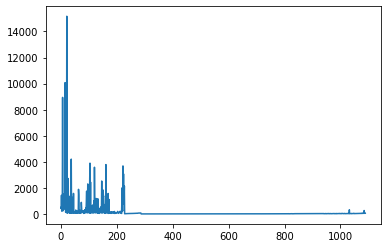

In [45]:
plt.plot(df['orderedQuantity'])